<a href="https://colab.research.google.com/github/marxav/ann_101/blob/master/ann_101_tensorflow_sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Python Librairies

In [ ]:
# package to store and manipulate neural-network input and output data
import numpy as np

# package to graphically display any data
import matplotlib.pyplot as plt

# package to manipulate neural-network models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# the code should be compatible with Tensflow v2
print("Tensorlow version:", tf.__version__)

Tensorlow version: 2.2.0


In [ ]:
# To check whether you code will use a GPU or not, uncomment the following two
# lines of code. You should either see:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

get_available_gpus()

['/device:GPU:0', '/device:GPU:1', '/device:GPU:2', '/device:GPU:3']

In [ ]:
import time

# trivial "debug" function to display the duration between time_1 and time_2
def get_duration(time_1, time_2):
  duration_time = time_2 - time_1
  m, s = divmod(duration_time, 60)
  h, m = divmod(m, 60)
  s,m,h = int(round(s, 0)), int(round(m, 0)), int(round(h, 0))
  duration = "duration: " + "{0:02d}:{1:02d}:{2:02d}".format(h, m, s)
  return duration

## Get the data

In [ ]:
X_train = np.array([0.765,0.838,0.329,0.277,0.45,0.833,0.44,0.634,0.351,0.784,0.589,0.816,0.352,0.591,0.04,0.38,0.816,0.732,0.32,0.597,0.908,0.146,0.691,0.75,0.568,0.866,0.705,0.027,0.607,0.793,0.864,0.057,0.877,0.164,0.729,0.291,0.324,0.745,0.158,0.098,0.113,0.794,0.452,0.765,0.983,0.001,0.474,0.773,0.155,0.875,])
Y_train = np.array([6.322,6.254,3.224,2.87,4.177,6.267,4.088,5.737,3.379,6.334,5.381,6.306,3.389,5.4,1.704,3.602,6.306,6.254,3.157,5.446,5.918,2.147,6.088,6.298,5.204,6.147,6.153,1.653,5.527,6.332,6.156,1.766,6.098,2.236,6.244,2.96,3.183,6.287,2.205,1.934,1.996,6.331,4.188,6.322,5.368,1.561,4.383,6.33,2.192,6.108,])
X_val = np.array([0.329,0.528,0.323,0.952,0.868,0.931,0.69,0.112,0.574,0.421,0.972,0.715,0.7,0.58,0.69,0.163,0.093,0.695,0.493,0.243,0.928,0.409,0.619,0.011,0.218,0.647,0.499,0.354,0.064,0.571,0.836,0.068,0.451,0.074,0.158,0.571,0.754,0.259,0.035,0.595,0.245,0.929,0.546,0.901,0.822,0.797,0.089,0.924,0.903,0.334,])
Y_val = np.array([3.221,4.858,3.176,5.617,6.141,5.769,6.081,1.995,5.259,3.932,5.458,6.193,6.129,5.305,6.081,2.228,1.912,6.106,4.547,2.665,5.791,3.829,5.619,1.598,2.518,5.826,4.603,3.405,1.794,5.23,6.26,1.81,4.18,1.832,2.208,5.234,6.306,2.759,1.684,5.432,2.673,5.781,5.019,5.965,6.295,6.329,1.894,5.816,5.951,3.258,])

In [ ]:
print('X_train contains %d samples' % X_train.shape)
print('Y_train contains %d samples' % Y_train.shape)
print('')
print('X_val contains %d samples' % X_val.shape)
print('Y_val contains %d samples' % Y_val.shape)

X_train contains 50 samples
Y_train contains 50 samples

X_val contains 50 samples
Y_val contains 50 samples


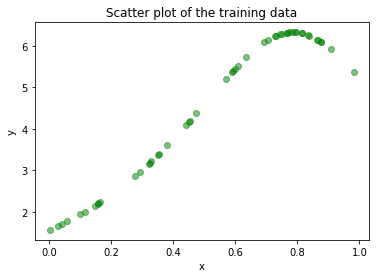

In [ ]:
# Graphically display our training data
plt.scatter(X_train, Y_train, color='green', alpha=0.5)
plt.title('Scatter plot of the training data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

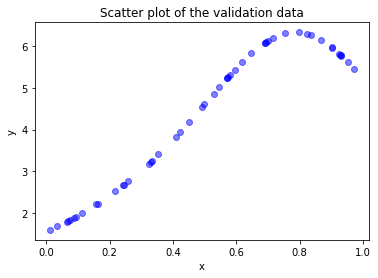

In [ ]:
# Graphically display our validation data
plt.scatter(X_val, Y_val, color='blue', alpha=0.5)
plt.title('Scatter plot of the validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Build the artificial neural-network

In [ ]:
def create_model():
  
  # This returns a tensor
  model = keras.Sequential([
    keras.layers.Input(shape=(1,), name='input_layer'),
    keras.layers.Dense(8, activation=tf.nn.relu, name='hidden_layer_1'),    
    keras.layers.Dense(8, activation=tf.nn.relu, name='hidden_layer_2'),    
    keras.layers.Dense(1, name='output_layer')
  ])

  model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.02), 
                loss='mean_squared_error',
                metrics=['mean_squared_error'])

  return model

In [ ]:
ann_model = create_model()

In [ ]:
# Display a textual summary of the newly created model
# Pay attention to size (a.k.a. total parameters) of the network
ann_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 8)                 16        
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 8)                 72        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 9         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print('trainable_params:', ann_model.count_params())

trainable_params: 97


## Train the artificial neural-network model

In [ ]:
callbacks_list = [
        EarlyStopping(
            monitor = 'mean_squared_error',
            mode = 'min',
            patience = 20,
            restore_best_weights=True,
        ),
    ]

t0 = time.time()
results = ann_model.fit(
    X_train,            
    Y_train, 
    verbose = False, # Try to set it to True    
    batch_size = 1,      
    epochs = 2000,     
    validation_data = (X_val, Y_val), # Optional              
    #callbacks = callbacks_list, # Optional
)
t1 = time.time()
print('training_%s' % get_duration(t0, t1))

training_duration: 00:04:26


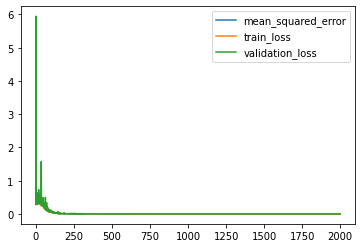

In [ ]:
plt.plot(results.history['mean_squared_error'], label = 'mean_squared_error')
plt.plot(results.history['loss'], label = 'train_loss')
plt.plot(results.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.show()

## Evaluate the model

In [ ]:
loss, mean_absolute_error = ann_model.evaluate(X_val, Y_val, verbose=True)

2/2 [==============================] - 0s 1ms/step - loss: 9.0674e-04 - mean_squared_error: 9.0674e-04


## Infer new output data

In [ ]:
X_test = [0., 0.2, 0.4, 0.6, 0.8, 1.0]
Ŷ_test = ann_model.predict(X_test)

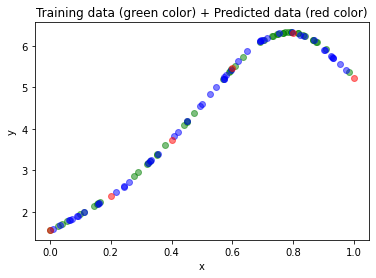

In [ ]:
# Display training data and predicted data graphically
plt.title('Training data (green color) + Predicted data (red color)')

# training data in green color
plt.scatter(X_train, Y_train, color='green',  alpha=0.5)

# validation data in blue color
plt.scatter(X_val, ann_model.predict(X_val), color='blue',  alpha=0.5)

# predicted data in blue color
plt.scatter(X_test, Ŷ_test, color='red',  alpha=0.5)

plt.xlabel('x')
plt.ylabel('y')
plt.show()